<a href="https://colab.research.google.com/github/AkankshaMS/PimaIndiansdata/blob/master/Pima_Indians_Diabetes_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url='https://raw.githubusercontent.com/AkankshaMS/DataScience/master/diabetes.csv'

In [ ]:
d = pd.read_csv(url)

Reading the dataset from my github repository.

In [ ]:
list(d.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

List of all the columns in the dataset.

In [ ]:
d.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Top 10 data in the dataset.

In [ ]:
d.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Bottom 10 data in the dataset.

In [ ]:
d.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


To check for null values if any.

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


General information about the dataset


In [ ]:
d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Find the count,mean,standard deviation ,minimum value,maximum value etc in the dataset

In [ ]:
data=pd.DataFrame(d)

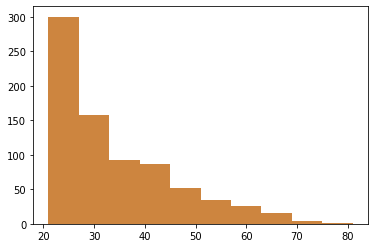

In [ ]:
plt.hist(data['Age'],facecolor='peru',bins=10)
plt.show()

Ages histogram

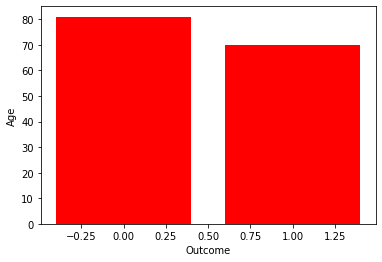

In [ ]:
plt.bar("Outcome","Age", data = d, color = "red")
plt.xlabel("Outcome")
plt.ylabel("Age")
plt.show()

Bar plot to show the ages and the likeliness of having diabetes.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. U

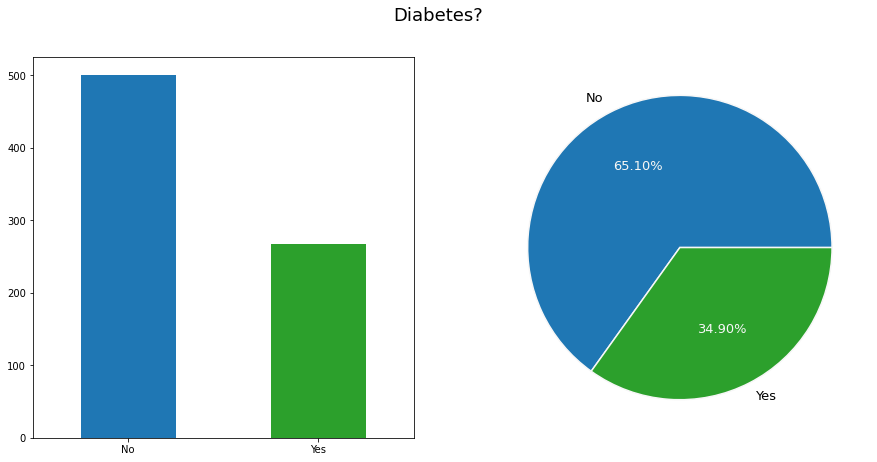

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = d.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = d.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F5"), ax[1].texts[3].set_color("#F7F7F7")

Bar plot and pie plot which shows the rate of people having diabetes.

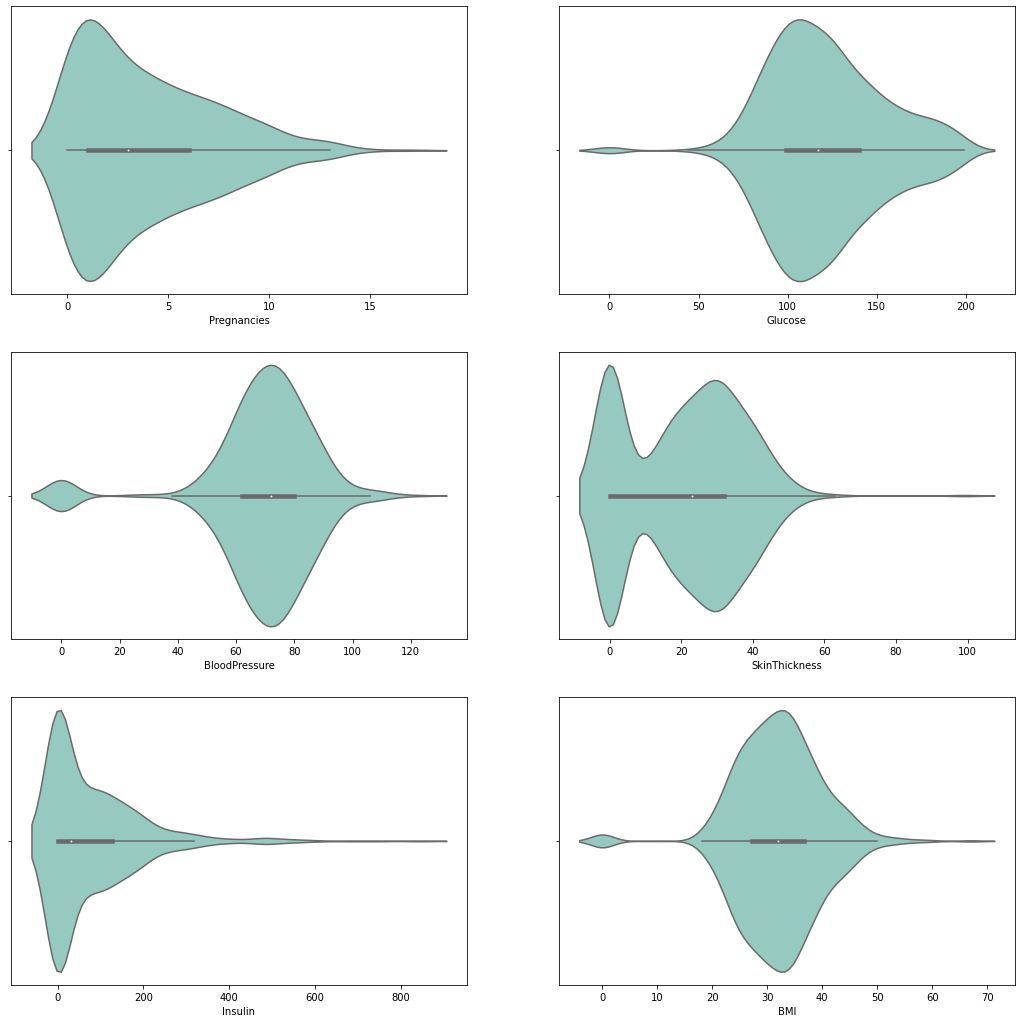

In [ ]:
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(18,18))
sns.violinplot(x="Pregnancies", data=d,ax=ax[0,0],palette='Set3')
sns.violinplot(x="Glucose", data=d,ax=ax[0,1],palette='Set3')
sns.violinplot (x ='BloodPressure', data=d, ax=ax[1,0], palette='Set3')
sns.violinplot(x='SkinThickness', data=d, ax=ax[1,1],palette='Set3')
sns.violinplot(x='Insulin', data=d, ax=ax[2,0], palette='Set3')
sns.violinplot(x='BMI', data=d, ax=ax[2,1],palette='Set3')
plt.show()

Violin plots for the attributes.

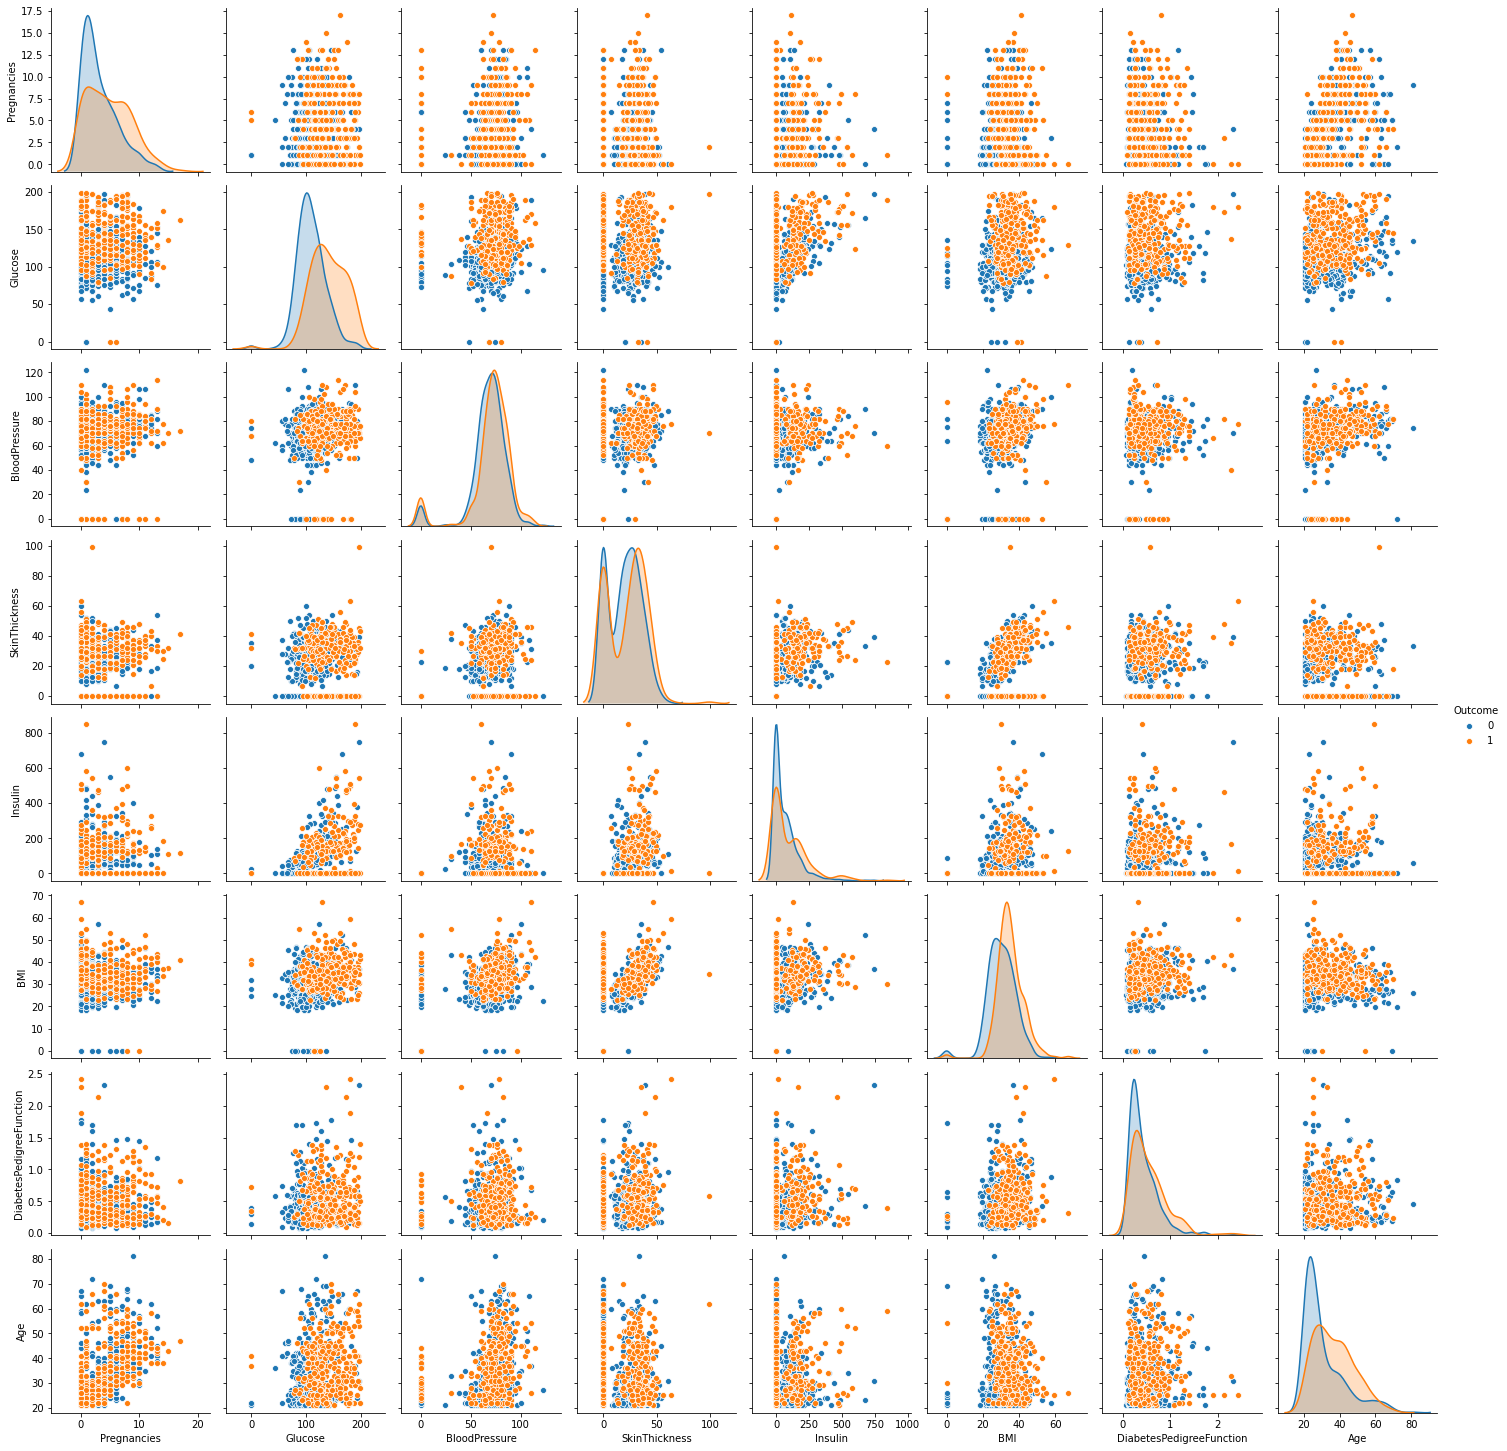

In [ ]:
sns.pairplot(data=d,hue='Outcome')

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.

In [ ]:
countinsulin = d[(d['Outcome'] > 0) & (d['Insulin'] > 0) ]
count=countinsulin.count()
print("Number of people suffering from diabetes are depending on the 2-hour serum insulin:",count['Outcome'])

Number of people suffering from diabetes are depending on the 2-hour serum insulin: 130


Shows that 130 people of all are dependent on the 2-hour serum insulin.


In [ ]:
x1 = d["Age"].values
x2 = d["Pregnancies"].values
x3 = d.Outcome.values

hist_data = [x1, x2, x3]

group_labels = ['age', 'pregnancies', 'outcome']
colors = ['#A56CC1', '#A6ACEC', '#63F5EF']

fig = ff.create_distplot(hist_data, group_labels, colors=colors, bin_size=0.5, show_rug=False)

fig['layout'].update(title='')

plotly.offline.iplot(fig, filename='Hist and Curve')

Hist and curve plot showing the relation between age, pregnancies and the outcome.

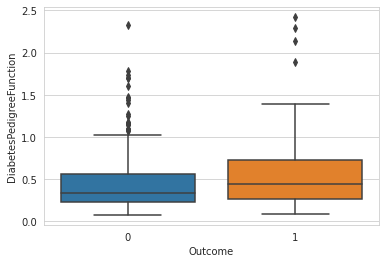

In [ ]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = d) 

Box plot to show how likely a person has diabetes based on family history (using the DiabetesPedigreeFunction)

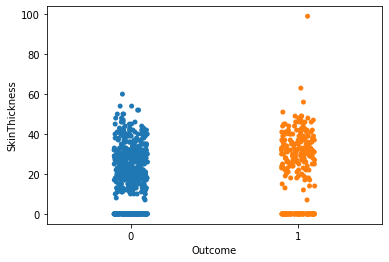

In [ ]:
a=d.Age<30
sns.stripplot(x ='Outcome', y ='SkinThickness', data = d, 
			jitter = True, dodge = True) 


Stripplot showing the diabetes rate in SkinThickness attribute and people less than 30 years of age.

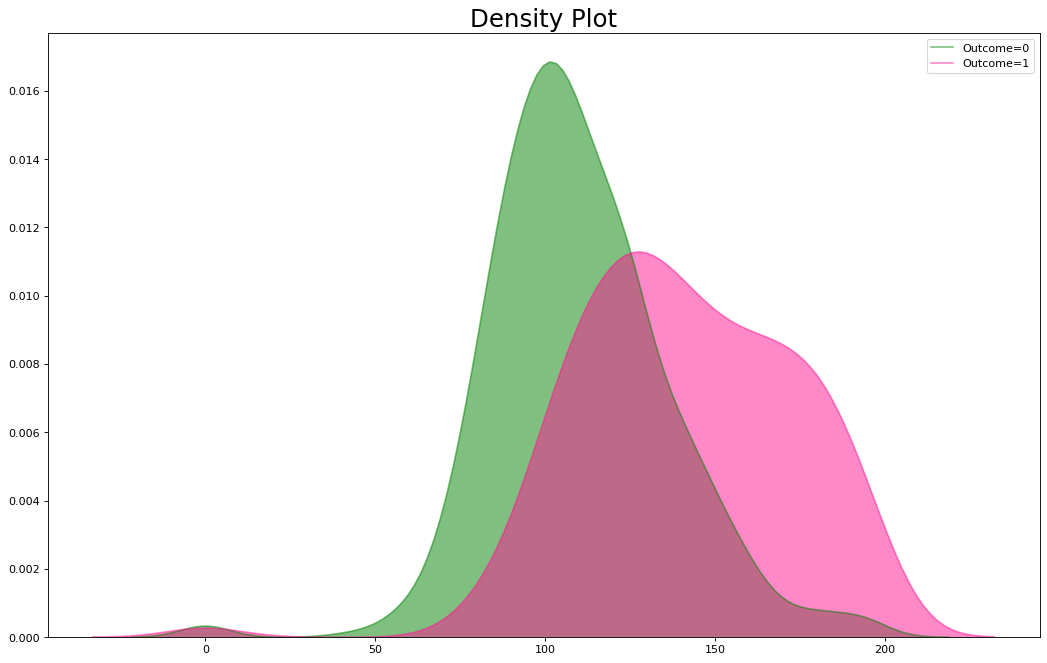

In [ ]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(d.loc[d['Outcome'] == 0, "Glucose"], shade=True, color="g", label="Outcome=0", alpha=.5)
sns.kdeplot(d.loc[d['Outcome'] == 1, "Glucose"], shade=True, color="deeppink", label="Outcome=1", alpha=.5)
# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

Density plot of Glucose and Outcome.

In [ ]:
def plot_corr(df,size=11):
  corr = df.corr() # calling the correlation function on the datafrmae
  fig, ax = plt.subplots(figsize=(size,size))
  ax.matshow(corr) # color code the rectangles by correlation value
  plt.xticks(range(len(corr.columns)),corr.columns) # draw x tickmarks
  plt.yticks(range(len(corr.columns)),corr.columns) # draw y tickmarks 
  

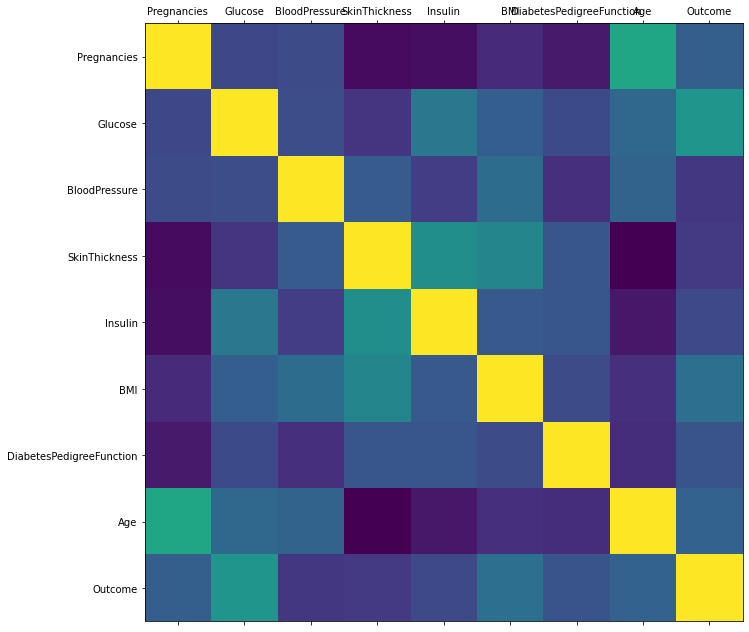

In [ ]:
plot_corr(d)

matrix of correlation between columns.  Yellow means that they are highly correlated.

In [ ]:
d.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Same as above figure but in numbers.

The Outcome column is string. We should vectorize it: change True to 1, False to 0 by using mapping

In [ ]:
diabetes_map = {True:1, False:0}

In [ ]:
d['Outcome']=d['Outcome'].map(diabetes_map)

In [ ]:
d.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Check that the Diabetes column has been replaced by 1 and 0

Check true/false ratio

In [ ]:
num_obs = len(d)
num_true = len(d.loc[d['Outcome'] == 1])
num_false = len(d.loc[d['Outcome'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


In this dataset there is 34.9% of cases where the instances have diabetes.

**Splitting data**

In [ ]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age',]
predicted_class_names = ['Outcome']

X = d[feature_col_names].values # these are factors for the prediction
y = d[predicted_class_names].values # this is what we want to predict

split_test_size = 0.3

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = split_test_size,random_state=42)
# 42 is the set.seed() equivalent in Python which generates repeatable random distribution

In [ ]:
print(X_train)

[[  1.     95.     60.    ...  23.9     0.26   22.   ]
 [  5.    105.     72.    ...  36.9     0.159  28.   ]
 [  0.    135.     68.    ...  42.3     0.365  24.   ]
 ...
 [ 10.    101.     86.    ...  45.6     1.136  38.   ]
 [  0.    141.      0.    ...  42.4     0.205  29.   ]
 [  0.    125.     96.    ...  22.5     0.262  21.   ]]


In [ ]:
print("{0:0.2f}% in training set".format((len(X_train)/len(d.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(d.index)) * 100))

69.92% in training set
30.08% in test set


To check if the values are spread evenly across the training and test data set

In [ ]:
print("Original True  : {0} ({1:0.2f}%)".format(len(d.loc[d['Outcome'] == 1]), (len(d.loc[d['Outcome'] == 1])/len(d.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(d.loc[d['Outcome'] == 0]), (len(d.loc[d['Outcome'] == 0])/len(d.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


In [ ]:
d.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


There is a value in SkinThickness column which is 0, we have to check for such values before proceeding.


In [ ]:
print("# rows in dataframe {0}".format(len(d)))
print("# rows missing glucose_conc: {0}".format(len(d.loc[d['Glucose'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(d.loc[d['BloodPressure'] == 0])))
print("# rows missing thickness: {0}".format(len(d.loc[d['SkinThickness'] == 0])))
print("# rows missing insulin: {0}".format(len(d.loc[d['Insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(d.loc[d['BMI'] == 0])))
print("# rows missing diab_pred: {0}".format(len(d.loc[d['DiabetesPedigreeFunction'] == 0])))
print("# rows missing age: {0}".format(len(d.loc[d['Age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


To remove the missing values, we fill them with the mean

In [ ]:
from sklearn.impute import SimpleImputer
# For all readings == 0, impute with mean
fill_0 = SimpleImputer(missing_values=0,strategy="mean")

X_train= fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

### **Training with Naive Bayes algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB
# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

Testing model's accuracy with training data.

In [ ]:
# predict values using training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library from scikit learn
from sklearn import metrics

# check naive bayes model's accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train)))
print()

Accuracy: 0.7542



Testing model's accuracy with testing data.

In [ ]:
nb_predict_test=nb_model.predict(X_test)

from sklearn import metrics

print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))

Accuracy:0.7359


Confusion matrix

In [ ]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test)))
print("")

Confusion Matrix
[[118  33]
 [ 28  52]]



Classification report

In [ ]:
print("Classification Report")
print("{0}".format(metrics.classification_report(y_test,nb_predict_test)))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



**Result:** Recall is 0.65, and precision is 0.61.

### **Training with Random Forest algorithm**





In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42) 
rf_model.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Testing model's accuracy with training data.

In [ ]:
rf_predict_train = rf_model.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,rf_predict_train)))
print()

Accuracy: 1.0000



Testing model's accuracy with testing data.

In [ ]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test)))
print()

Accuracy:0.7403



Confusion matrix

In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")

Confusion Matrix
[[119  32]
 [ 28  52]]



Classification report

In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



**Result:** Recall is 0.65, and precision is 0.62.

### **Logistic Regression**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy:0.7489

Confusion Matrix
[[125  26]
 [ 32  48]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



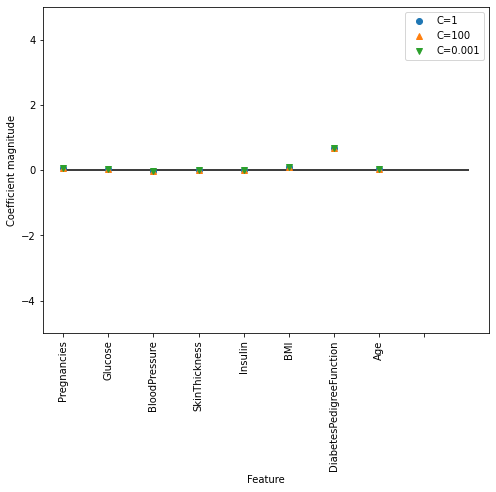

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(C=0.1,random_state=42)#C is the regularisation parameter, default value is 1
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print()
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,lr_predict_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test,lr_predict_test))


#showing for different values of regularisation parameter C
diabetes_features = [x for i,x in enumerate(d.columns) if i!=8]
plt.figure(figsize=(8,6))
plt.plot(lr_model.coef_.T, 'o', label="C=1")
plt.plot(lr_model.coef_.T, '^', label="C=100")
plt.plot(lr_model.coef_.T, 'v', label="C=0.001")
plt.xticks(range(d.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, d.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')


**Result:** Recall is 0.60, and precision is 0.65.

Stronger regularization (C=0.001) pushes coefficients more and more toward zero. Inspecting the plot more closely, we can also see that feature “DiabetesPedigreeFunction”, for C=100, C=1 and C=0.001, the coefficient is positive.

Hence, recall for Naive Bayes model and Random forest model is better than Linear Regression. 